In [28]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

from keras.preprocessing.text import Tokenizer
from keras.utils import pad_sequences, to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, SimpleRNN
from keras import optimizers
from keras.wrappers.scikit_learn import KerasClassifier

from sklearn.metrics import accuracy_score

import seaborn as sns

In [29]:
# from google.colab import drive
# drive.mount('/content/drive')
# reviews = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/yelp.csv')
# reviews.head(2)

In [30]:
reviews = pd.read_csv('yelp.csv')
reviews.head(2)

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0


In [31]:
reviews['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [32]:
reviews['stars'].value_counts()

4    3526
5    3337
3    1461
2     927
1     749
Name: stars, dtype: int64

<Axes: >

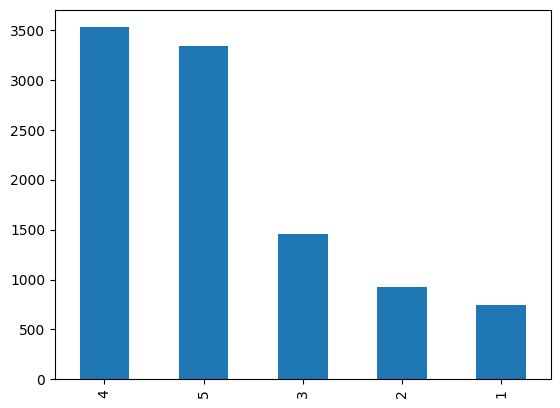

In [33]:
reviews['stars'].value_counts().plot(kind='bar')

all stars 4 and 5 are positive, others are negative


In [36]:
reviews['stars'] = np.where(reviews['stars'] >= 4, 1, 0)

<Axes: >

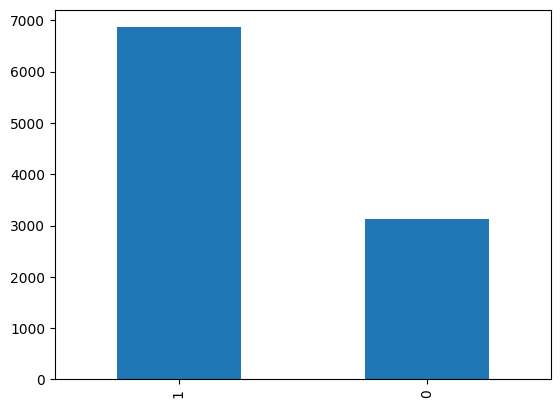

In [37]:
reviews['stars'].value_counts().plot(kind='bar')

removing some items to make 6000 positive reviews


In [38]:
reviews['stars'].value_counts()

1    6863
0    3137
Name: stars, dtype: int64

In [39]:
reviews = reviews.drop(reviews[reviews.stars == 1].iloc[:863].index)

In [41]:
max_features = 6000
# we will use the Tokenizer class: create a word-to-index dictionary. In the word-to-index dictionary
tokenizer = Tokenizer(num_words=max_features, split = ' ')
tokenizer.fit_on_texts(reviews['text'].values)

#to convert sentences into vector /numbers
x = tokenizer.texts_to_sequences(reviews['text'].values)
x = pad_sequences(x)

y = reviews['stars']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42, shuffle=True
)


In [43]:
print("shape of X_train:", x_train.shape)
print("shape of X_test:", x_test.shape)

shape of X_train: (6395, 927)
shape of X_test: (2742, 927)


In [44]:
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of y_train: (6395,)
shape of y_test: (2742,)


In [45]:
#Create RNN model
embed_dim = 128
lstm_out = 196
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 128, input_length=x_train.shape[1]))
model.add(tf.keras.layers.SpatialDropout1D(0.5))
model.add(tf.keras.layers.LSTM(196))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(100, activation = tf.nn.relu))
model.add(tf.keras.layers.Dropout(0.4))
model.add(tf.keras.layers.Dense(2, activation = tf.nn.softmax))
  

In [46]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 927, 128)          768000    
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 927, 128)         0         
 lDropout1D)                                                     
                                                                 
 lstm_1 (LSTM)               (None, 196)               254800    
                                                                 
 dropout_2 (Dropout)         (None, 196)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               19700     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                      

In [47]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [48]:
from keras.callbacks import EarlyStopping

early_callback = EarlyStopping(monitor='loss', patience=3)

In [49]:
model.fit(x_train, y_train, validation_split = 0.2, verbose = 2, callbacks=[early_callback], epochs=30 , batch_size=32)

Epoch 1/30
160/160 - 32s - loss: 0.6146 - accuracy: 0.6761 - val_loss: 0.5075 - val_accuracy: 0.7826 - 32s/epoch - 201ms/step
Epoch 2/30
160/160 - 22s - loss: 0.4275 - accuracy: 0.8077 - val_loss: 0.4164 - val_accuracy: 0.8116 - 22s/epoch - 137ms/step
Epoch 3/30
160/160 - 15s - loss: 0.3042 - accuracy: 0.8794 - val_loss: 0.4036 - val_accuracy: 0.8186 - 15s/epoch - 91ms/step
Epoch 4/30
160/160 - 15s - loss: 0.2093 - accuracy: 0.9189 - val_loss: 0.4462 - val_accuracy: 0.8100 - 15s/epoch - 95ms/step
Epoch 5/30
160/160 - 12s - loss: 0.1613 - accuracy: 0.9386 - val_loss: 0.7092 - val_accuracy: 0.8124 - 12s/epoch - 75ms/step
Epoch 6/30
160/160 - 13s - loss: 0.1051 - accuracy: 0.9636 - val_loss: 0.6543 - val_accuracy: 0.7787 - 13s/epoch - 79ms/step
Epoch 7/30
160/160 - 12s - loss: 0.1227 - accuracy: 0.9554 - val_loss: 0.6933 - val_accuracy: 0.7537 - 12s/epoch - 74ms/step
Epoch 8/30
160/160 - 10s - loss: 0.0947 - accuracy: 0.9638 - val_loss: 0.8234 - val_accuracy: 0.8045 - 10s/epoch - 65ms/ste

In [50]:
history = model.history

In [51]:
#To test the accuracy score

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
print(accuracy_score(y_test, y_pred_classes))

86/86 [==============================] - 2s 18ms/step
0.7509117432531


In [52]:
#Testing model on new input
sample = "Their service is not good"
sample_item = [sample]
sample_item = tokenizer.texts_to_sequences(sample_item)
sample_item = pad_sequences(sample_item, maxlen=len(sample) + 1)

print(sample_item)
sentiment = model.predict(sample_item,batch_size=1,verbose = 2)[0]

if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")


[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 45 57  9
  22 25]]
1/1 - 0s - 331ms/epoch - 331ms/step
negative


In [53]:
#Testing model on new input
sample = "I liked this service"
sample_item = [sample]
sample_item = tokenizer.texts_to_sequences(sample_item)
sample_item = pad_sequences(sample_item, maxlen=len(sample) + 1)

print(sample_item)
sentiment = model.predict(sample_item,batch_size=1,verbose = 2)[0]

if(np.argmax(sentiment) == 0):
    print("negative")
elif (np.argmax(sentiment) == 1):
    print("positive")


[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   3
  406  16  57]]
1/1 - 0s - 19ms/epoch - 19ms/step
positive
